In [18]:
# pandasをインポートする
import pandas as pd

In [19]:
#  エクセルのデータの読み込み
# データ元:e-Stat「平成30年産野菜生産出荷統計]農林水産省調べ
df=pd.read_excel('f005-30-027 12.32.58.xls')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# NaNのみの列と行を削除する
df=df.dropna(axis=0,how='all').dropna(axis=1,how='all')
df.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,NaN,作付面積,収量(10a),収穫量,出荷量,対前年産比,NaN,NaN,NaN,NaN
8,全国農業地域,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(参考)
9,・,NaN,NaN,NaN,NaN,作付面積,収量(10a),収穫量,出荷量,対平均\n収量比
10,都 道 府 県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,ha,kg,ｔ,ｔ,％,％,％,％,％


In [21]:
# 「Unnamed: 0」と「Unnamed: 4」の行を抽出する
df=df[['Unnamed: 0','Unnamed: 4']]
df.head()

,Unnamed: 0,Unnamed: 4
7,NaN,収穫量
8,全国農業地域,NaN
9,・,NaN
10,都 道 府 県,NaN
12,NaN,ｔ


In [22]:
# ラベル「Unnamed: 0」を「都道府県」に､ラベル「Unnamed: 4」を「収穫量」に変える
df=df.rename(columns={df.columns[0]:'都道府県',df.columns[1]:'収穫量'})
df.head()

,都道府県,収穫量
7,NaN,収穫量
8,全国農業地域,NaN
9,・,NaN
10,都 道 府 県,NaN
12,NaN,ｔ


In [23]:
# 北海道の列のインデックスを確認する
df.index.get_loc(29)

19

In [24]:
# 沖縄の列のインデックスを確認する
df.index.get_loc(85)

65

In [25]:
# 北海道から沖縄までの列を抽出する(途中でインデックスが飛んでいるため｡沖縄 のインデックスは66に)
df=df.iloc[19:66]
df.head()

,都道府県,収穫量
29,北海道,56300
31,青森,17300
32,岩手,29600
33,宮城,6900
34,秋田,8950


In [26]:
# 欠損値の削除（収穫量「…」の都道府県を削除する)
df=df[df['収穫量']!='…']

In [27]:
# インデックスを都道府県に入れ替える
df=df.rename(index=df['都道府県'])
df.head()

,都道府県,収穫量
北海道,北海道,56300
青森,青森,17300
岩手,岩手,29600
宮城,宮城,6900
秋田,秋田,8950


In [28]:
# 都道府県がダブるので､一列を削除する
df=df.drop('都道府県',axis=1)
df.head()

,収穫量
北海道,56300
青森,17300
岩手,29600
宮城,6900
秋田,8950


In [29]:
%matplotlib inline
# matplotlib.pyplotをインストールする
import matplotlib.pyplot as plt

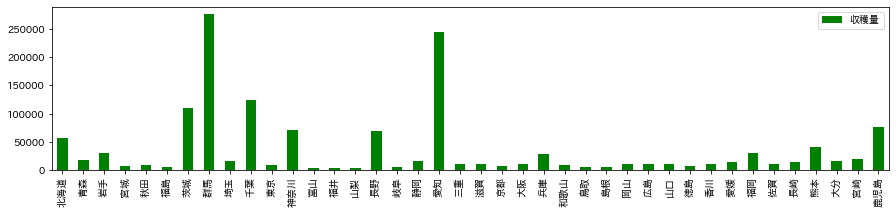

In [31]:
# figureクラスからインスタンスを作成する
fig=plt.figure (figsize=(15,3))

# figオブジェクト（インスタンス）のメソッドadd_subplot()を利用する
ax=fig.add_subplot(111)

# dfオブジェクトのplot()メソッドを利用する｡引数にfigオブジェクトを入れる
df.plot(kind='bar',ax=ax,color='green')
plt.show()